In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Implementing the simple quadratic integrate-and-fire neuron (Izhikevich)

\begin{equation}
\begin{aligned}
C \frac{\partial v}{\partial t} = k(v - v_r)(v - v_t) - u + I && \text{if } v \ge v_{peak} \\
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\frac{\partial u}{\partial t} = a[b(v - v_r) - u] && v \leftarrow c, u \leftarrow u + d \\
\end{aligned}
\end{equation}

 $v$ is the membrane potential, $u$ is the recovery current, $C$ is the membrane capacitance, $v_r$ is the resting membrane potential, and $v_t$ is the instantaneous threshold potential.

In [4]:
def neuron_model(parameters, C, vr, vt, k, vpeak, T=1000, tau=1, plot=True):
    n = round(T/tau)
    v = vr * np.ones(n); u = 0 * v
    I = np.concatenate([np.zeros(int(0.1 * n)), 70 * np.ones(int(0.9 * n))])
    a, b, c, d = parameters
    
    for i in range(n-1):
        v[i+1] = v[i] + tau*(k*(v[i] - vr) * (v[i] - vt) - u[i] + I[i]) / C
        u[i+1] = u[i] + tau * a * (b * (v[i] - vr) - u[i])
        if v[i+1] >= vpeak:
            v[i] = vpeak
            v[i+1] = c
            u[i+1] = u[i+1] + d
    
    print(parameters)
    
    if plot:
        plt.plot(tau * [i + 1 for i in range(n)], v)
        plt.title("Quadratic Integrate-and-Fire Neuron")
        plt.xlabel("time (ms)")
        plt.ylabel("membrane potential, v (mV)")
        plt.show()
    return v

Test case for generating example graph.

[0.03, -2, -50, 100]


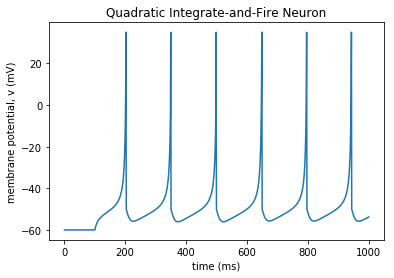

In [5]:
# represents [a, b, c, d]
parameters = [0.03, -2, -50, 100]
C = 100; vr = -60; vt = -40; k = 0.7
vpeak = 35

test = neuron_model(parameters, C, vr, vt, k, vpeak)